# Laboratorium 10

## Import zależności

In [1]:
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np 

## Funkcje pomocnicze

In [2]:
def same(first, second, eps):
    return np.all(np.abs(first - second) < eps)

In [3]:
def show_bar_plot(val1, val2, val3, label1, label2, label3, xlabel, ylabel):
    x = np.arange(1)
    width = 0.3

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width - 0.05, [val1], width, label=label1)
    rects1 = ax.bar(x, [val2], width, label=label2)
    rects2 = ax.bar(x + width + 0.05, [val3], width, label=label3)

    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xlabel(xlabel)
    ax.legend()

    fig.tight_layout()
    plt.show()


In [4]:
def apply_linspace(fun, end=4):
    lin = np.linspace(0, end, end * (2**7))
    return fun(lin * 2 * np.pi)

In [5]:
def show_sig(sig, end=4, figsize=(10,10), linspace=True):
    lin = np.linspace(0,end,end * (2**7))
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    ax.plot(lin * 2 * np.pi, apply_linspace(sig, end) if linspace else sig)
    plt.show()   

## Zadanie 1

### Konstrukcja macierzy Fouriera

In [6]:
def fourier_matrix(n):
    indices = np.arange(n).reshape(-1,1) @ np.arange(n).reshape(1,-1)
    xi = np.exp(np.pi * -2j / n)
    fourier_matrix = np.full((n,n), xi)
    return np.power(fourier_matrix, indices)

### Funkcja realizująca DFT

In [7]:
def dft(vector):
    vector = np.asarray(vector)
    n = vector.shape[0]
    matrix = fourier_matrix(n)
    return matrix @ vector

Przykład działania:

In [8]:
vector = np.random.rand(10)
print(vector)

[0.04566943 0.71280807 0.17998075 0.85654001 0.95760081 0.58335303
 0.15157729 0.71972004 0.43298204 0.29800991]


In [9]:
vector_dft = dft(vector)
print(vector_dft)

[ 4.93824137+0.00000000e+00j -0.91493384-6.07085974e-01j
 -0.48698119+6.01208627e-01j  0.27203521-1.22936007e+00j
 -0.40958333-1.40785550e-01j -1.40262075-2.24733500e-16j
 -0.40958333+1.40785550e-01j  0.27203521+1.22936007e+00j
 -0.48698119-6.01208627e-01j -0.91493384+6.07085974e-01j]


Czas działania:

In [10]:
vector_test_time1 = np.random.rand(2 ** 7)

In [11]:
%%timeit -n 3 -r 4 -o 
dft(vector_test_time1)

18.1 ms ± 1.08 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 18.1 ms ± 1.08 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [12]:
res = _
dft_time1 = res.best

In [13]:
vector_test_time2 = np.random.rand(2 ** 10)

In [14]:
%%timeit -n 3 -r 4 -o 
dft(vector_test_time2)

338 ms ± 4.7 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 338 ms ± 4.7 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [15]:
res = _
dft_time2 = res.best

In [16]:
vector_test_time3 = np.random.rand(2 ** 13)

In [17]:
%%timeit -n 1 -r 1 -o 
dft(vector_test_time3)

21.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 21.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [18]:
res = _
dft_time3 = res.best

### Funkcja realizująca IDFT

In [19]:
def idft(vector):
    vector = np.asarray(vector)
    n = vector.shape[0]
    matrix = fourier_matrix(n)
    return np.conj(matrix @ np.conj(vector)) / n

Przykład działania:

In [20]:
idft(vector_dft)

array([0.04566943-4.32986980e-16j, 0.71280807+4.44089210e-17j,
       0.17998075+3.55271368e-16j, 0.85654001+5.55111512e-16j,
       0.95760081+9.99200722e-17j, 0.58335303-3.55271368e-16j,
       0.15157729+5.55111512e-17j, 0.71972004+8.88178420e-17j,
       0.43298204-6.21724894e-16j, 0.29800991-6.21724894e-16j])

Czas działania:

In [21]:
vector_dft = dft(np.random.rand(10 ** 3))

In [22]:
%%timeit -n 3 -r 4
dft(vector_dft)

448 ms ± 30.5 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)


### Test działania implementacji

In [23]:
def test(function, vector, eps=10 ** -7):
    y = function(vector)
    x = idft(y)
    print('Czy po odwróceniu otrzymujemy tą samą macierz:', same(x, vector, eps))
    
    y_lib = np.fft.fft(vector)
    print('Czy biblioteczna implementacja dft zwraca ten sam wynik:', same(y, y_lib, eps))
    
    x_lib = np.fft.ifft(y_lib)
    print('Czy biblioteczna implementacja idft zwraca ten sam wynik:', same(x, x_lib, eps))

Test działania dft

In [24]:
test(dft, np.random.rand(1))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [25]:
test(dft, np.random.rand(8))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [26]:
test(dft, np.random.rand(2 ** 7))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [27]:
test(dft, np.random.rand(2 ** 10))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


### Szybka transformata Fouriera - FFT

In [28]:
def fft(vector):
    vector = np.asarray(vector)
    n = vector.shape[0]

    if n == 1:
        return vector
    
    even_idx = fft(vector[::2])
    odd_idx = fft(vector[1::2])
    
    multiplier = np.exp(np.pi * np.arange(n) * -2j / n)
    res = np.concatenate([even_idx + multiplier[:n // 2] * odd_idx,even_idx + multiplier[n // 2:] * odd_idx])
    return res

Test działania:

In [29]:
test(fft, np.random.rand(1))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [30]:
test(fft, np.random.rand(8))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [31]:
test(fft, np.random.rand(2 ** 7))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


In [32]:
test(fft, np.random.rand(2 ** 10))

Czy po odwróceniu otrzymujemy tą samą macierz: True
Czy biblioteczna implementacja dft zwraca ten sam wynik: True
Czy biblioteczna implementacja idft zwraca ten sam wynik: True


Czas działania:

In [33]:
%%timeit -n 3 -r 4 -o 
fft(vector_test_time1)

6.59 ms ± 820 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 6.59 ms ± 820 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [34]:
res = _
fft_time1 = res.best

In [35]:
%%timeit -n 3 -r 4 -o 
fft(vector_test_time2)

30.1 ms ± 2.42 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 30.1 ms ± 2.42 ms per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [36]:
res = _
fft_time2 = res.best

In [37]:
%%timeit -n 1 -r 1 -o 
fft(vector_test_time3)

269 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 269 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [38]:
res = _
fft_time3 = res.best

### Porównanie czasu działania implementacji

Czas działania implementacji bibliotecznej:

In [39]:
%%timeit -n 3 -r 4 -o 
np.fft.fft(vector_test_time1)

The slowest run took 27.74 times longer than the fastest. This could mean that an intermediate result is being cached.
62.8 µs ± 81.3 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 62.8 µs ± 81.3 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [40]:
res = _
lib_time1 = res.best

In [41]:
%%timeit -n 3 -r 4 -o 
np.fft.fft(vector_test_time2)

The slowest run took 5.23 times longer than the fastest. This could mean that an intermediate result is being cached.
66.2 µs ± 36.6 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)


<TimeitResult : 66.2 µs ± 36.6 µs per loop (mean ± std. dev. of 4 runs, 3 loops each)>

In [42]:
res = _
lib_time2 = res.best

In [43]:
%%timeit -n 1 -r 1 -o 
np.fft.fft(vector_test_time3)

760 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 760 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [44]:
res = _
lib_time3 = res.best

Porównanie

In [45]:
md('''
| Implementacja | n = 2 ^ 7  | n = 2 ^ 10 | n = 2 ^ 13 |
|---------------|------------|------------|------------|
|   DFT         | %f s       | %f s       | %f s       |
|   FFT         | %f s       | %f s       | %f s       |
|   Numpy FFT   | %f s       | %f s       | %f s       |
''' % (
    dft_time1, dft_time2, dft_time3,
    fft_time1, fft_time2, fft_time3,
    lib_time1, lib_time2, lib_time3
))


| Implementacja | n = 2 ^ 7  | n = 2 ^ 10 | n = 2 ^ 13 |
|---------------|------------|------------|------------|
|   DFT         | 0.016958 s       | 0.333564 s       | 21.778255 s       |
|   FFT         | 0.005660 s       | 0.026406 s       | 0.269289 s       |
|   Numpy FFT   | 0.000007 s       | 0.000022 s       | 0.000760 s       |


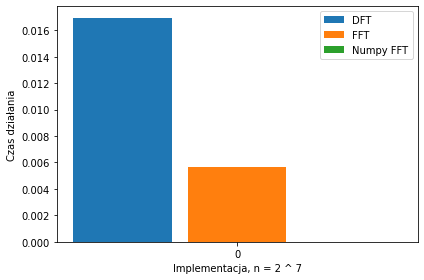

In [46]:
show_bar_plot(dft_time1, fft_time1, lib_time1, 'DFT', 'FFT', 'Numpy FFT', 'Implementacja, n = 2 ^ 7', 'Czas działania')

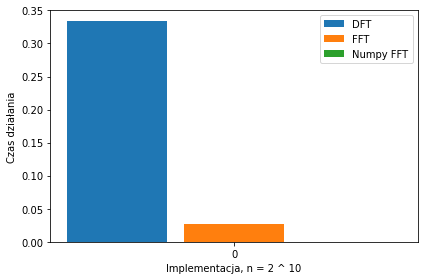

In [47]:
show_bar_plot(dft_time2, fft_time2, lib_time2, 'DFT', 'FFT', 'Numpy FFT', 'Implementacja, n = 2 ^ 10', 'Czas działania')

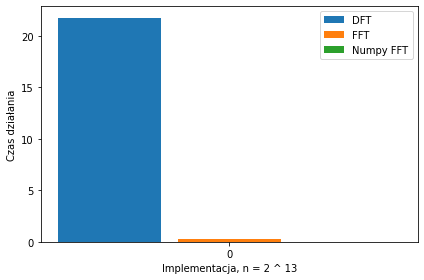

In [48]:
show_bar_plot(dft_time3, fft_time3, lib_time3, 'DFT', 'FFT', 'Numpy FFT', 'Implementacja, n = 2 ^ 13', 'Czas działania')

Nie jest zaskoczeniem dla mnie, że najwyższą wydajnością wykazała się implementacjia biblioteczna. 

Warto zauważyć jednak, że różnica pomiędzy czasem wykonania mojej implementacji DFT a FFT jest ogromna we wszystkich przypadkach testowych, podczas gdy implementacja FFT nie jest znacząco trudniejsza do przygotowania. 

## Zadanie 2
### Sygnały czasowo - amplitudowe

In [49]:
sin1 = lambda x: np.sin(x)
sin2 = lambda x: np.sin(x * 2)
sin3 = lambda x: np.sin(x * 7)
sin4 = lambda x: np.sin(x * 10)
sin5 = lambda x: np.sin(x * 13)

Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

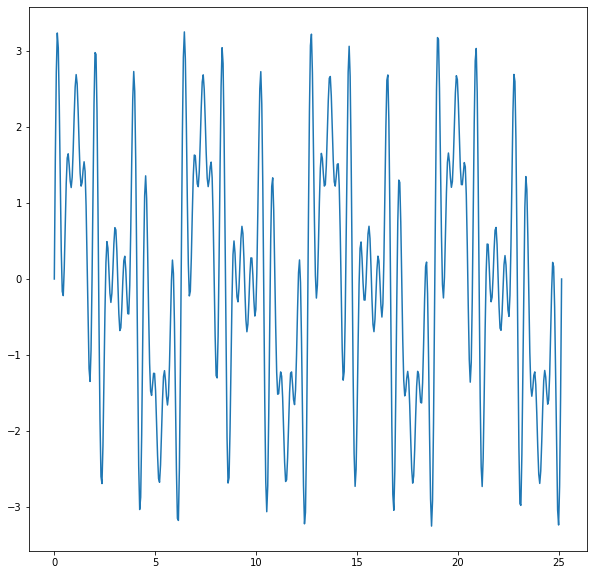

In [50]:
signal1 = lambda x: sin1(x) + sin2(x) + sin3(x) + sin4(x) + sin5(x)

show_sig(signal1)

Sygnał złożony z pięciu (tych samych) sygnałów sinusoidalnych ułożonych przedziałami

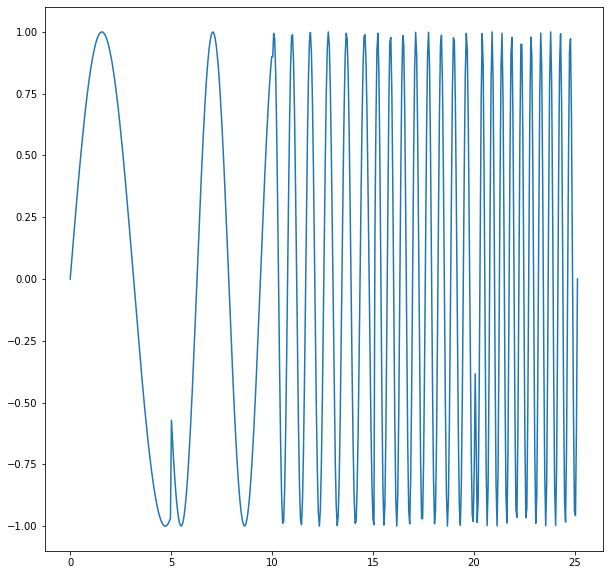

In [51]:
signal2 = lambda x: np.concatenate([
                    sin1(x[: x.shape[0] // 5]),
                    sin2(x[x.shape[0] // 5 : 2 * x.shape[0] // 5]),
                    sin3(x[2 * x.shape[0] // 5 : 3 *x.shape[0] // 5]),
                    sin4(x[3 * x.shape[0] // 5 : 4 * x.shape[0] // 5]),
                    sin5(x[4 * x.shape[0] // 5 :])
                    ])

show_sig(signal2)

### Transformacja sygnałów testowych do domeny częstotliwości 

Sygnał będący sumą pięciu sygnałów sinusoidalnych

Część rzeczywista

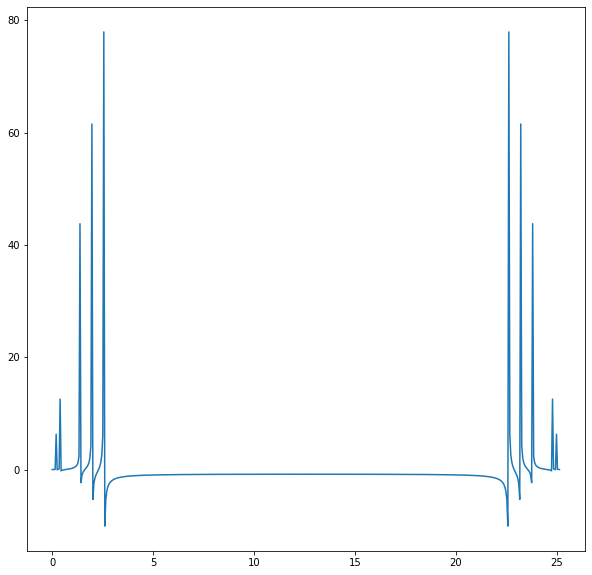

In [52]:
show_sig(np.real(fft(apply_linspace(signal1))), linspace=False)

Część urojona

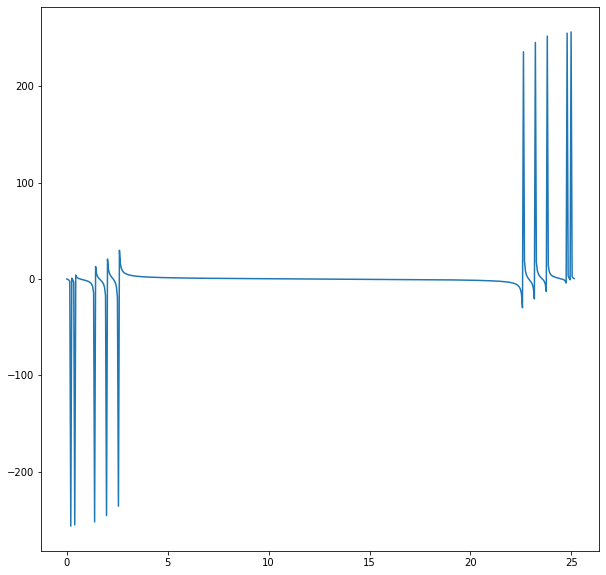

In [53]:
show_sig(np.imag(fft(apply_linspace(signal1))), linspace=False)

Sygnał będący sumą interwałów 

Część rzeczywista

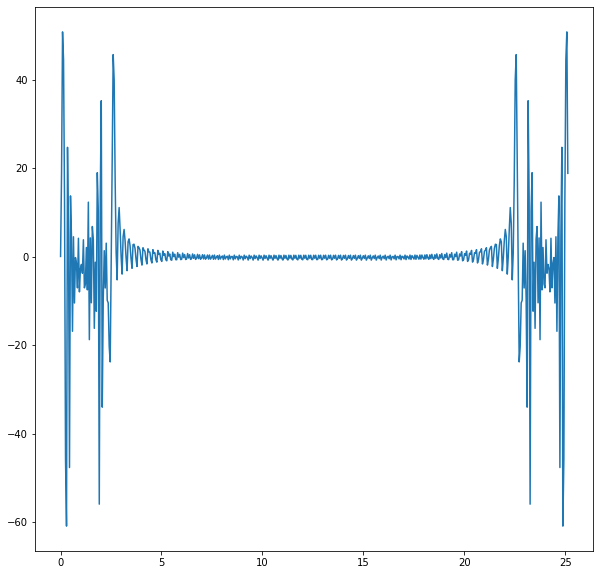

In [54]:
show_sig(np.real(fft(apply_linspace(signal2))), linspace=False)

Część urojona

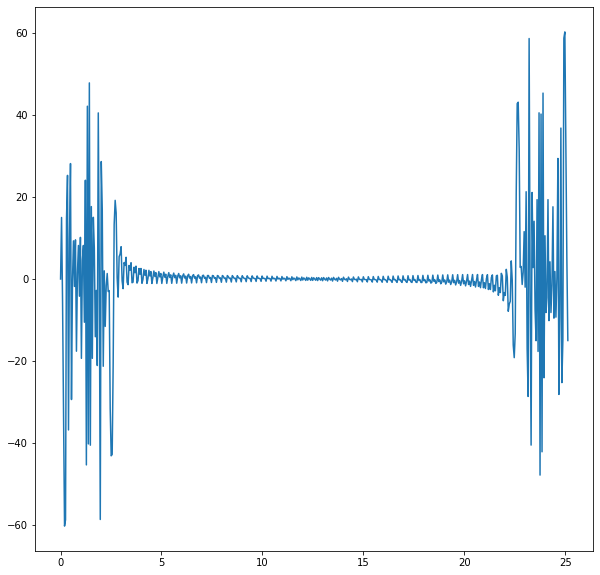

In [55]:
show_sig(np.imag(fft(apply_linspace(signal2))), linspace=False)